# **_Number of Histogram Bins: Different Methods of Calculating `k`_**

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

## **_Description:_**

This Python Jupyter Notebook is my extrapolation on a coding lesson from the Descriptive Statistics section of Mike X. Cohen's Statistics & Machine Learning course on Udemy.

The goal is to practice what I've learned and to have a handy, comprehensive guide for future reference.

-   Udemy course: https://www.udemy.com/course/statsml_x

-   Professor Cohen's website: https://www.mikexcohen.com/

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

### **_Create a dataset and plot histograms with various methods of calculating number of bins._**

-   #### **_Additionally, contrast what plots looks like based on differing numbers of bins._**

-   #### **_Use Matplotlib's `GridSpec` functionality to place all the plots in one figure._**

##### **1.** _Hard code the bin count with a good estimate for number of bins._

##### **2.** _Hard code the bin count with a bad estimate (low) for number of bins._

##### **3.** _Hard code the bin count with a bad estimate (high) for number of bins._

##### **4.** _Calculate number of bins using the **STURGES** rule:_

$$
    k \; (\textsf{num bins})\; = \; \lceil \log2(n) \rceil + 1
$$

##### **5.** _Calculate number of bins using the **FREEDMAN-DIACONIS (FD)** rule:_

$$
\begin{gathered}
    h \; (\textsf{bin width}) \; = \; 2 \; \frac{\text{IQR}}{\sqrt[3]{n}}
    \\ \\
    k \; (\textsf{num bins})\; = \;
    \left\lceil
        \frac{\max(x) - \min(x)}{h}
    \right\rceil
\end{gathered}
$$

##### **6** _Use the Matplotlib's `.hist(bins='fd')` argument._

##### **7.** _Plot with Seaborn's `.histplot()`, which automatically uses the **FD** rule._

##### **8.** _Create a line histogram contrasting the distribution with increasing number of bins._

##### **9.** _Create a line histogram contrasting the normalized distribution with increasing number of bins._

##### **10.** _Create array of number of bins which increases LOGARITHMICALLY, overlay histograms with Seaborn. (Fun result!)_

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

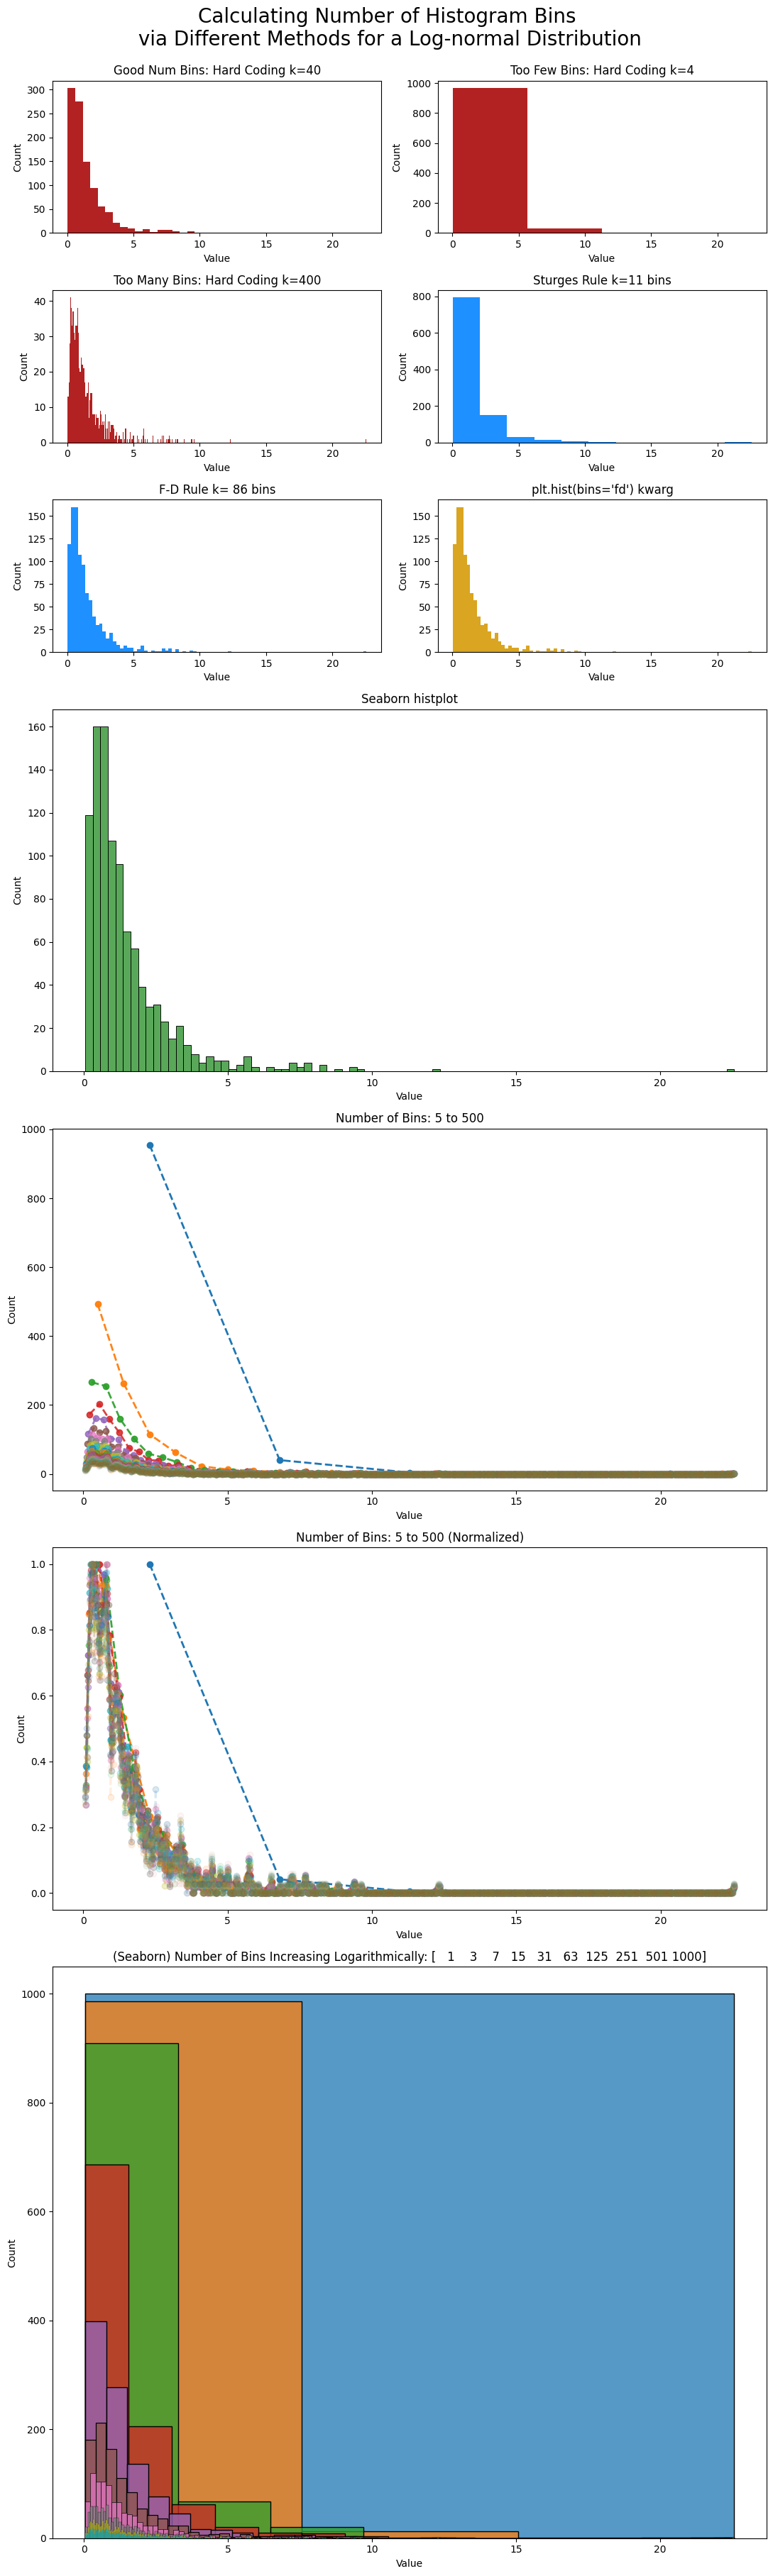

In [1]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import scipy.stats as stats
import seaborn as sns

n = 1000
k = 40

# # Create a random log-normal distribution:
mu, sigma = 0, 1  # Mean and standard deviation
data = np.random.lognormal(mu, sigma, n)

fig = plt.figure(figsize=(11, 37))

# # Create subplots with GridSpec functionality...
gs = GridSpec(12, 2, figure=fig)
axes = [
    fig.add_subplot(gs[0, 0]),
    fig.add_subplot(gs[0, 1]),
    fig.add_subplot(gs[1, 0]),
    fig.add_subplot(gs[1, 1]),
    fig.add_subplot(gs[2, 0]),
    fig.add_subplot(gs[2, 1]),
    fig.add_subplot(gs[3:5, :]),
    fig.add_subplot(gs[5:7, :]),
    fig.add_subplot(gs[7:9, :]),
    fig.add_subplot(gs[9:12, :]),
]

# # Plot 1 # #
# # Plot data with good hard-coded value for k:
k_good = 40
axes[0].hist(data, k_good, color="firebrick")
axes[0].set_title("Good Num Bins: Hard Coding k=%g" % k_good)

# Choose factor to make lower/higher k's:
distort_factor = 10

# # Plot 2 # #
# # Plot data with low hard-coded value for k:
k_low = int(k_good / distort_factor)
axes[1].hist(data, k_low, color="firebrick")
axes[1].set_title("Too Few Bins: Hard Coding k=%g" % k_low)

# # Plot 3 # #
# # Plot data with high hard-coded value for k:
k_high = int(k_good * distort_factor)
axes[2].hist(data, k_high, color="firebrick")
axes[2].set_title("Too Many Bins: Hard Coding k=%g" % k_high)

# # Plot 4 # #
# # Calculate Sturges manually and plot...
k_sturges = np.ceil(np.log2(n)) + 1
axes[3].hist(data, int(k_sturges), color="dodgerblue")
axes[3].set_title("Sturges Rule k=%g bins" % k_sturges)

# # Plot 5 # #
# # Calculate FD manually and plot...
h_fd = 2 * stats.iqr(data) * n ** (-1 / 3)
k_fd = np.ceil((max(data) - min(data)) / h_fd)
axes[4].hist(data, int(k_fd), color="dodgerblue")
axes[4].set_title("F-D Rule k= %g bins" % k_fd)

# # Plot 6 # #
# # Use helpful bins='fd' functionality to bypass
# #  calculations...
axes[5].hist(data, bins="fd", color="goldenrod")
axes[5].set_title("plt.hist(bins='fd') kwarg")

# # Plot 7 # #
# # Use Seaborn sns.histplot():
sns.histplot(data=data, ax=axes[6], color="forestgreen")
axes[6].set_title("Seaborn histplot")

# # Plot 8 # #
# # Plot data with increasing number of bins...
num_bins = np.linspace(5, n / 2, 25, dtype=np.int64)
# Create alpha values:
alphas = np.linspace(1, 0, len(num_bins))

for bin_i in range(len(num_bins)):
    y, x = np.histogram(data, int(num_bins[bin_i]))
    x = (x[:-1] + x[1:]) / 2
    axes[7].plot(x, y, "o--", lw=2, alpha=alphas[bin_i])
axes[7].set_title("Number of Bins: %g to %g" % (num_bins[0], num_bins[-1]))

# # Plot 9 # #
# # Plot normalized data with increasing number of bins...
for bin_i in range(len(num_bins)):
    y, x = np.histogram(data, int(num_bins[bin_i]))
    x = (x[:-1] + x[1:]) / 2
    y = y / np.max(y)
    axes[8].plot(x, y, "o--", lw=2, alpha=alphas[bin_i])
axes[8].set_title("Number of Bins: %g to %g (Normalized)" % (num_bins[0], num_bins[-1]))

# # Plot 10 # #
# # Plot normalized data with log-spaced number of bins...
num_bins = np.logspace(0.3, 3, num=10, dtype=np.int64)
for bin_i in num_bins:
    sns.histplot(data=data, ax=axes[9], bins=int(bin_i))
axes[9].set_title("(Seaborn) Number of Bins Increasing Logarithmically: %s" % num_bins)

# # Add labels programmatically...
for i in range(len(axes)):
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Count")

sup_title = "Calculating Number of Histogram Bins\n"
sup_title += " via Different Methods for a Log-normal Distribution\n\n"
plt.suptitle(sup_title, size=20)

# # Make room...
plt.tight_layout()
plt.show()

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

## **_Conclusions:_**

-   **Freedman-Diaconis (FD)** is the best method for calculating number of bins.

-   **Sturges** falls a little short, literally and figuratively.

-   The _logarithmically-calculated number of bins_ plot via Seaborn looks pretty cool.

-   `GridSpec` is hard to get a handle on, but with a little practice provides amazingly flexible functionality with a lot of possibilities.

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

<hr style="height: 0; box-shadow: 0 0 5px 4px dodgerblue; width: 85%;">

<hr style="height: 0; box-shadow: 0 0 5px 4px #5EDC1F; width: 75%;">


<hr style="height: 0; box-shadow: 0 0 5px 4px magenta; width: 65%;">


<hr style="height: 0; box-shadow: 0 0 5px 4px gold; width: 55%;">

<font size=2>

_Andrew Blais, Boston, Massachusetts_

GitHub: https://github.com/andrewblais

Website/Python Web Development Porfolio: https://www.andrewblais.dev/

</font>